In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
from catboost import CatBoostClassifier
from tpot import TPOTClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,BaggingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC

C:\Users\rohit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
pd.set_option("display.max_columns", None)

In [3]:
ds_train = pd.read_csv("train.csv")
ds_test = pd.read_csv("test.csv")

In [4]:
ds_train

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,1,0,2,0,0,0,0,19,2,0,1,7,3,0,0,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,0,0,0,0,1,7,11,1,0,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,Class_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,0,0,0,1,0,0,0,2,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5,0,0,0,0,0,0,0,0,1,0,0,6,0,0,3,0,0,0,Class_1
99996,99996,0,0,0,0,0,0,0,1,2,0,0,0,0,0,4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,3,0,1,0,0,0,7,0,0,0,2,0,0,0,10,0,0,0,Class_2
99997,99997,0,0,0,0,0,1,0,0,0,4,0,0,3,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,4,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,2,0,Class_3
99998,99998,0,0,0,0,1,0,0,0,0,5,0,0,0,0,2,0,0,0,3,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,4,0,Class_2


In [5]:
ds_test

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,100000,0,0,0,0,0,0,4,4,0,0,5,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,5,0,5,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,1,0,0,0,2,0,7,7,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,4,0,2,0,0,2,0,3,6,3,0,0,6,0,3,0,1,0,0,0,1,0,2,1
2,100002,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,4,4,0,0,0,0,0,3,0,0,0,0,0,2,11,0,0,0,0,1,0,0,0,0,6,0
3,100003,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,4,1,0,0,1,0,0,1,1,1,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,6,9,14,3
4,100004,0,0,0,0,0,0,1,0,4,0,0,1,0,0,9,0,0,0,0,0,0,3,0,0,0,0,0,0,2,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149995,0,0,0,0,0,0,0,1,5,0,2,0,0,0,7,5,0,0,0,0,6,1,0,0,7,2,0,0,2,0,0,0,3,0,0,0,0,1,0,1,0,1,0,0,0,3,0,0,3,0
49996,149996,0,0,0,0,0,0,10,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,11,0,0,0,0,1,0,0,0,0,0,3
49997,149997,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,2,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49998,149998,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,6,0,0,1,0,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,1


In [6]:
def null_values(dataset):
    for keys, values in dict(dataset.isna().sum()).items():
        if values!=0:
            print(keys,values)

In [7]:
null_values(ds_train)

In [8]:
null_values(ds_test)

In [9]:
ds_train.drop(columns="id",axis=1, inplace=True)
ds_test.drop(columns="id",axis=1, inplace=True)

In [10]:
correlation = ds_train.corr()

In [11]:
correlation

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
feature_0,1.00,0.01,-0.01,0.01,-0.00,-0.00,0.00,0.01,-0.00,0.01,0.01,0.01,0.01,-0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.01,0.00,-0.00,-0.00,0.00,0.01,0.01,0.00,0.02,0.00,0.00,0.00,0.01,0.00,-0.00,0.00,0.01,-0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00
feature_1,0.01,1.00,0.01,0.00,0.01,0.00,0.01,0.01,0.01,-0.00,0.01,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.01,-0.00,-0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01
feature_2,-0.01,0.01,1.00,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.02,-0.00,-0.00,0.01,0.01,-0.00,0.00,-0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.00,-0.00,0.02,0.01,0.01,0.01,0.01,0.00,0.01,0.00,0.00,-0.00,0.00,0.01,-0.00,0.02,0.01,-0.00,0.00,0.00,0.00,0.01
feature_3,0.01,0.00,0.01,1.00,0.00,-0.00,0.01,0.01,0.01,0.00,-0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.01,-0.00,0.01,-0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.01,-0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.01,-0.01,0.01
feature_4,-0.00,0.01,0.00,0.00,1.00,0.00,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.00,-0.00,-0.01,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,-0.00,-0.00,-0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.01
feature_5,-0.00,0.00,0.01,-0.00,0.00,1.00,-0.00,0.01,-0.00,0.00,0.00,0.00,-0.00,0.01,-0.00,-0.01,0.01,-0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.01,0.00,0.01,0.01,0.00,-0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.00,-0.00,0.00,0.01,0.00,0.01,0.01,0.01,0.01,0.00,-0.00,0.00,0.01,0.00
feature_6,0.00,0.01,0.00,0.01,0.00,-0.00,1.00,0.01,0.00,0.01,0.00,0.01,0.01,-0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,-0.00,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.01
feature_7,0.01,0.01,0.01,0.01,0.01,0.01,0.01,1.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.01,-0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.01
feature_8,-0.00,0.01,0.00,0.01,0.01,-0.00,0.00,0.00,1.00,0.00,0.00,0.01,0.00,0.01,0.00,-0.00,0.00,0.01,0.01,-0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.01,0.00,-0.00,-0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,-0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,-0.00,0.00,0.01
feature_9,0.01,-0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,1.00,-0.00,0.00,0.00,0.00,-0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.01,0.01,0.01,-0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.01,-0.00,0.00,0.01,-0.00,0.01,0.01


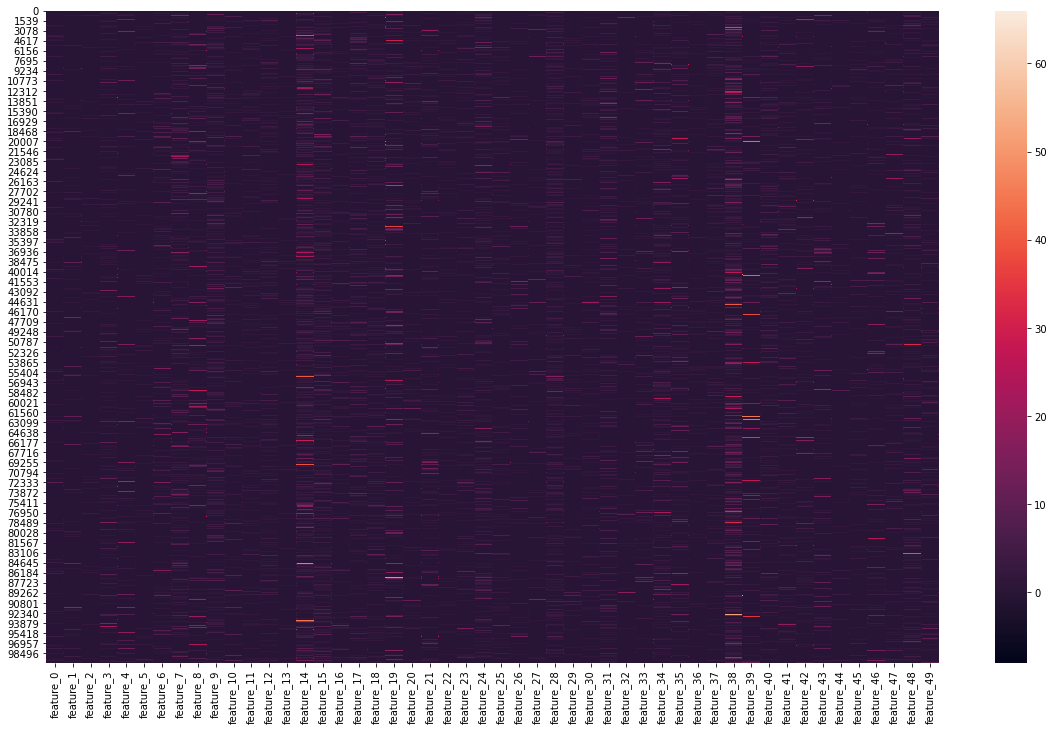

In [12]:
plt.figure(figsize=(20,12))
sns.heatmap(ds_train.iloc[:,:-1])
plt.show()

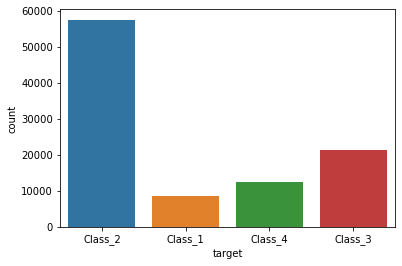

In [13]:
sns.countplot(ds_train["target"])
plt.show()

In [14]:
ds_train["target"].value_counts()

Class_2    57497
Class_3    21420
Class_4    12593
Class_1     8490
Name: target, dtype: int64

In [15]:
# X1 = ds_train.iloc[:,:-1]
# y1 = ds_train.iloc[:,-1]

# smk = SMOTE(random_state=0,n_jobs=-1)
# X_bal,y_bal = smk.fit_resample(X1,y1)

In [16]:
# sns.countplot(y_bal)
# plt.show()

In [17]:
# y_bal.value_counts()

In [18]:
# type(X_bal)

In [20]:
# X_bal = X_bal.values
# y_bal =y_bal.values

In [21]:
# type(X_bal)

In [22]:
X = ds_train.loc[:, ds_train.columns != "target"].values
y = ds_train.loc[:, "target"].values
X_test_original = ds_test.iloc[:,:].values

In [23]:
enc = LabelEncoder()

In [25]:
y = enc.fit_transform(y)
# y_bal = enc.fit_transform(y_bal)

In [26]:
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, random_state=0, test_size=0.5)
# Xb_train, Xb_valid_test, yb_trian, yb_valid_test = train_test_split(X_bal, y_bal, random_state=0, test_size=0.5)

In [27]:
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, random_state=0, test_size=0.4)
# Xb_valid, Xb_test, yb_valid, yb_test = train_test_split(Xb_valid_test, yb_valid_test, random_state=0, test_size=0.4)

In [28]:
#skf = StratifiedKFold(n_splits= 10)

In [29]:
#classifier = CatBoostClassifier(task_type="GPU", iterations=2000, random_state=0, eval_metric="Accuracy")

In [30]:
# train_accuracy_score = []
# valid_accuracy_score = []
# log_loss_valid_list = []

# skf.get_n_splits(X,y)

# for train_index, valid_index in skf.split(X,y):
#     X_skf_train, X_skf_valid = X[train_index], X[valid_index]
#     y_skf_train, y_skf_valid = y[train_index], y[valid_index]
    
#     classifier.fit(X_skf_train,y_skf_train)
    
#     train_score = classifier.score(X_skf_train,y_skf_train)
#     valid_score = classifier.score(X_skf_valid,y_skf_valid)
    
#     y_skf_valid_predict_prob = classifier.predict_proba(X_skf_valid)
#     log_loss_valid = log_loss(y_skf_valid,y_skf_valid_predict_prob)
    
#     train_accuracy_score.append(train_score)
#     valid_accuracy_score.append(valid_score)
#     log_loss_valid_list.append(log_loss_valid)

In [31]:
# print(train_accuracy_score)

In [32]:
# print(valid_accuracy_score)

In [33]:
# print(log_loss_valid_list)

In [34]:
sc = StandardScaler()

In [35]:
# lc_bal_data = LazyClassifier()
# lc_bal_data.fit(X_train, X_valid, y_train, y_valid)

In [36]:
#lc = LazyClassifier()
#lc.fit(X_train, X_valid, y_train, y_valid)

In [37]:
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)
X_test_original = sc.transform(X_test_original)

In [38]:
bnb = BernoulliNB()

In [39]:
bnb.fit(X_train, y_train)
pred_valid_bnb = bnb.predict_proba(X_valid)
pred_test_bnb = bnb.predict_proba(X_test)
pred_test_original_bnb = bnb.predict_proba(X_test_original)

In [40]:
pred_valid_bnb_df = pd.DataFrame(pred_valid_bnb)
pred_test_bnb_df = pd.DataFrame(pred_test_bnb)
pred_test_original_bnb_df = pd.DataFrame(pred_test_original_bnb)

In [41]:
knc = KNeighborsClassifier(n_jobs=-1)

In [42]:
knc.fit(X_train, y_train)
pred_valid_knc = knc.predict_proba(X_valid)
pred_test_knc = knc.predict_proba(X_test)
pred_test_original_knc = knc.predict_proba(X_test_original)

In [43]:
pred_valid_knc_df = pd.DataFrame(pred_valid_knc)
pred_test_knc_df = pd.DataFrame(pred_test_knc)
pred_test_original_knc_df = pd.DataFrame(pred_test_original_knc)

In [44]:
lr = LogisticRegression(n_jobs=-1)

In [45]:
lr.fit(X_train, y_train)
pred_valid_lr = lr.predict_proba(X_valid)
pred_test_lr = lr.predict_proba(X_test)
pred_test_original_lr = lr.predict_proba(X_test_original)

In [46]:
pred_valid_lr_df = pd.DataFrame(pred_valid_lr)
pred_test_lr_df = pd.DataFrame(pred_test_lr)
pred_test_original_lr_df = pd.DataFrame(pred_test_original_lr)

In [54]:
lsvc = LinearSVC()

In [55]:
lsvc.fit(X_train, y_train)
pred_valid_lsvc = lsvc.decision_function(X_valid)
pred_test_lsvc = lsvc.decision_function(X_test)
pred_test_original_lsvc = lsvc.decision_function(X_test_original)

In [56]:
pred_valid_lsvc_df = pd.DataFrame(pred_valid_lsvc)
pred_test_lsvc_df = pd.DataFrame(pred_test_lsvc)
pred_test_original_lsvc_df = pd.DataFrame(pred_test_original_lsvc)

In [49]:
sgdc = SGDClassifier(n_jobs=-1)

In [51]:
sgdc.fit(X_train, y_train)
pred_valid_sgdc = sgdc.decision_function(X_valid)
pred_test_sgdc = sgdc.decision_function(X_test)
pred_test_original_sgdc = sgdc.decision_function(X_test_original)

In [52]:
pred_valid_sgdc_df = pd.DataFrame(pred_valid_sgdc)
pred_test_sgdc_df = pd.DataFrame(pred_test_sgdc)
pred_test_original_sgdc_df = pd.DataFrame(pred_test_original_sgdc)

In [53]:
pred_valid_sgdc_df

,0,1,2,3
0,-1.34,0.93,-1.22,-1.47
1,-1.07,0.29,-1.25,-1.18
2,-1.09,0.52,-1.10,-1.19
3,-1.76,1.21,-1.32,-1.31
4,-1.25,0.92,-1.18,-1.06
...,...,...,...,...
29995,-1.21,0.36,-1.04,-1.30
29996,-1.22,1.16,-0.99,-1.02
29997,-0.96,0.81,-1.14,-1.02
29998,-1.12,0.88,-0.76,-1.24


In [57]:
df_valid = pd.concat([pred_valid_bnb_df, pred_valid_knc_df, pred_valid_lr_df, pred_valid_lsvc_df, pred_valid_sgdc_df],axis=1)
df_test = pd.concat([pred_test_bnb_df, pred_test_knc_df, pred_test_lr_df, pred_test_lsvc_df, pred_test_sgdc_df],axis=1)
df_test_original = pd.concat([pred_test_original_bnb_df, pred_test_original_knc_df, pred_test_original_lr_df, pred_test_original_lsvc_df, pred_test_original_sgdc_df],axis=1)

In [58]:
df_valid

,0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3
0,0.08,0.64,0.23,0.05,0.20,0.40,0.20,0.20,0.09,0.58,0.26,0.07,-0.82,0.16,-0.51,-0.88,-1.34,0.93,-1.22,-1.47
1,0.11,0.45,0.35,0.09,0.00,0.60,0.20,0.20,0.09,0.52,0.26,0.13,-0.82,0.03,-0.49,-0.73,-1.07,0.29,-1.25,-1.18
2,0.09,0.68,0.13,0.10,0.00,0.60,0.20,0.20,0.08,0.56,0.21,0.15,-0.83,0.11,-0.59,-0.70,-1.09,0.52,-1.10,-1.19
3,0.09,0.76,0.08,0.07,0.00,1.00,0.00,0.00,0.10,0.69,0.13,0.07,-0.81,0.41,-0.75,-0.85,-1.76,1.21,-1.32,-1.31
4,0.07,0.72,0.09,0.12,0.40,0.40,0.20,0.00,0.08,0.62,0.16,0.14,-0.85,0.24,-0.67,-0.71,-1.25,0.92,-1.18,-1.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.07,0.44,0.38,0.11,0.20,0.60,0.00,0.20,0.07,0.55,0.28,0.10,-0.88,0.10,-0.46,-0.79,-1.21,0.36,-1.04,-1.30
29996,0.10,0.70,0.12,0.07,0.20,0.60,0.20,0.00,0.09,0.60,0.20,0.11,-0.82,0.19,-0.60,-0.77,-1.22,1.16,-0.99,-1.02
29997,0.08,0.47,0.26,0.19,0.00,0.60,0.40,0.00,0.08,0.55,0.20,0.18,-0.84,0.10,-0.59,-0.66,-0.96,0.81,-1.14,-1.02
29998,0.08,0.57,0.24,0.11,0.00,0.20,0.80,0.00,0.08,0.56,0.23,0.13,-0.85,0.10,-0.57,-0.73,-1.12,0.88,-0.76,-1.24


In [59]:
df_test

,0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3
0,0.07,0.57,0.18,0.18,0.00,0.80,0.20,0.00,0.07,0.56,0.21,0.15,-0.86,0.12,-0.58,-0.69,-1.09,0.70,-1.05,-1.02
1,0.08,0.49,0.24,0.19,0.00,0.60,0.20,0.20,0.08,0.54,0.23,0.15,-0.85,0.08,-0.54,-0.70,-1.18,0.48,-1.12,-1.13
2,0.08,0.58,0.24,0.10,0.00,0.40,0.40,0.20,0.08,0.58,0.22,0.12,-0.85,0.16,-0.54,-0.75,-0.98,0.94,-0.99,-1.12
3,0.09,0.45,0.39,0.07,0.20,0.20,0.40,0.20,0.09,0.52,0.31,0.08,-0.82,0.07,-0.43,-0.85,-1.29,0.23,-0.91,-1.22
4,0.09,0.68,0.14,0.08,0.00,0.60,0.40,0.00,0.09,0.62,0.19,0.10,-0.82,0.21,-0.63,-0.78,-1.32,1.15,-1.13,-1.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.07,0.46,0.22,0.26,0.00,0.80,0.00,0.20,0.07,0.54,0.21,0.17,-0.85,0.09,-0.56,-0.67,-1.02,0.84,-1.14,-1.05
19996,0.07,0.57,0.21,0.16,0.20,0.80,0.00,0.00,0.09,0.57,0.22,0.12,-0.82,0.10,-0.57,-0.73,-1.23,0.60,-0.40,-1.14
19997,0.07,0.55,0.19,0.20,0.20,0.80,0.00,0.00,0.07,0.58,0.18,0.17,-0.86,0.17,-0.64,-0.67,-1.05,0.81,-0.86,-0.78
19998,0.08,0.59,0.18,0.15,0.00,0.60,0.40,0.00,0.08,0.53,0.25,0.14,-0.84,0.04,-0.47,-0.73,-0.99,0.32,-1.08,-1.09


In [60]:
df_test_original

,0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3
0,0.10,0.65,0.14,0.10,0.20,0.40,0.20,0.20,0.09,0.62,0.18,0.11,-0.82,0.24,-0.63,-0.78,-1.22,0.31,-0.97,-1.17
1,0.08,0.68,0.17,0.07,0.00,0.40,0.20,0.40,0.09,0.58,0.20,0.12,-0.82,0.12,-0.57,-0.75,-1.26,0.01,-0.72,-1.09
2,0.09,0.61,0.19,0.11,0.00,0.60,0.00,0.40,0.09,0.62,0.18,0.11,-0.83,0.23,-0.64,-0.77,-1.18,0.55,-1.12,-1.18
3,0.10,0.48,0.35,0.07,0.00,0.60,0.00,0.40,0.09,0.50,0.32,0.08,-0.80,0.04,-0.38,-0.83,-1.35,-0.66,-1.08,-1.42
4,0.08,0.63,0.18,0.12,0.00,0.40,0.60,0.00,0.07,0.59,0.19,0.14,-0.86,0.19,-0.62,-0.71,-1.09,1.18,-1.06,-1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.11,0.73,0.12,0.04,0.00,0.80,0.00,0.20,0.11,0.68,0.14,0.07,-0.77,0.39,-0.78,-0.87,-1.45,1.26,-1.40,-1.33
49996,0.08,0.57,0.16,0.19,0.00,1.00,0.00,0.00,0.08,0.62,0.15,0.15,-0.85,0.24,-0.70,-0.70,-1.12,1.01,-1.00,-0.81
49997,0.08,0.52,0.18,0.22,0.00,0.20,0.80,0.00,0.09,0.55,0.21,0.15,-0.80,0.10,-0.58,-0.69,-1.20,0.39,-1.30,-1.20
49998,0.07,0.58,0.14,0.20,0.00,0.80,0.20,0.00,0.08,0.60,0.16,0.16,-0.84,0.21,-0.68,-0.68,-1.07,0.80,-0.94,-0.96


In [61]:
df_valid = df_valid.iloc[:,:].values
df_test = df_test.iloc[:,:].values
df_test_original = df_test_original.iloc[:,:].values

In [57]:
sc2 = StandardScaler()

In [77]:
df_valid = sc.fit_transform(df_valid)
df_test = sc.transform(df_test)
df_test_original = sc.transform(df_test_original)

In [78]:
df_valid

array([[-0.59783833,  0.87718948,  0.16576979, ...,  0.53107112,
        -0.89055112, -1.80543874],
       [ 2.09414592, -1.59288315,  1.74249636, ..., -0.97713441,
        -1.07072304, -0.22046955],
       [ 0.70686552,  1.34124065, -1.08362431, ..., -0.44129548,
        -0.26668849, -0.26008789],
       ...,
       [-0.68922015, -1.35221114,  0.6508498 , ...,  0.24768301,
        -0.47483949,  0.69254846],
       [-0.22804237, -0.04881967,  0.34480026, ...,  0.40975759,
         1.42755818, -0.52626989],
       [ 0.31988683, -1.11857761,  0.97432374, ...,  0.44870455,
        -0.46577741, -0.16294472]])

In [79]:
df_test

array([[-1.32446156, -0.04753463, -0.407666  , ..., -0.01097109,
        -0.02748783,  0.72048857],
       [-0.6099285 , -1.05677242,  0.35212802, ..., -0.54774383,
        -0.37853747,  0.11023652],
       [-0.32783805,  0.10233359,  0.29360221, ...,  0.53660825,
         0.25176573,  0.1344978 ],
       ...,
       [-1.49806495, -0.34392464, -0.31216646, ...,  0.23046286,
         0.91486605,  2.02730899],
       [-0.64387734,  0.26870643, -0.40869892, ..., -0.92934983,
        -0.17886522,  0.30727594],
       [-0.32571122, -1.69161473,  1.55652462, ...,  0.26421235,
        -0.74080818, -0.21985844]])

In [80]:
df_test_original

array([[ 0.89261794,  1.04789909, -0.88590351, ..., -0.93643107,
         0.3832998 , -0.13905007],
       [-0.4466535 ,  1.40779141, -0.53705235, ..., -1.63680709,
         1.63692601,  0.31262488],
       [ 0.45107086,  0.43734489, -0.2748399 , ..., -0.37184989,
        -0.37530274, -0.19794689],
       ...,
       [-0.36664673, -0.64212779, -0.48981804, ..., -0.75055491,
        -1.28920131, -0.30868666],
       [-1.21839683,  0.13134522, -0.88580727, ...,  0.21204126,
         0.50837388,  1.01506965],
       [-0.5833126 ,  0.44427556, -0.47842624, ..., -0.75087751,
        -1.91521226, -0.8083067 ]])

In [81]:
xgb = XGBClassifier(n_jobs=-1)

In [82]:
xgb.fit(df_valid,y_valid)
print(xgb.score(df_valid, y_valid))
print(xgb.score(df_test, y_test))

0.6852
0.5717


In [83]:
prob_test_xgb = xgb.predict_proba(df_test)
prob_test_original_xgb = xgb.predict_proba(df_test_original)

In [84]:
log_loss(y_test,prob_test_xgb)

1.128980636459589

In [85]:
bnb2 = BernoulliNB()

In [86]:
bnb2.fit(df_valid,y_valid)
print(bnb2.score(df_valid, y_valid))
print(bnb2.score(df_test, y_test))

0.4968
0.49985


In [87]:
prob_test_bnb2 = bnb2.predict_proba(df_test)
prob_test_original_bnb2 = bnb2.predict_proba(df_test_original)

In [88]:
log_loss(y_test,prob_test_bnb2)

1.2012296523069648

In [73]:
y_predict = bnb2.predict_proba(df_test_original)

In [74]:
y_predict

array([[0.08196952, 0.58503207, 0.2010007 , 0.1319977 ],
       [0.082472  , 0.58406094, 0.19924979, 0.13421727],
       [0.08652079, 0.59244571, 0.18671044, 0.13432306],
       ...,
       [0.08380229, 0.585655  , 0.20805434, 0.12248837],
       [0.08380229, 0.585655  , 0.20805434, 0.12248837],
       [0.082472  , 0.58406094, 0.19924979, 0.13421727]])

In [75]:
target = pd.DataFrame(y_predict, columns=["Class_1","Class_2","Class_3","Class_4"])

In [76]:
target

,Class_1,Class_2,Class_3,Class_4
0,0.08,0.59,0.20,0.13
1,0.08,0.58,0.20,0.13
2,0.09,0.59,0.19,0.13
3,0.09,0.51,0.26,0.13
4,0.08,0.59,0.21,0.12
...,...,...,...,...
49995,0.09,0.59,0.19,0.13
49996,0.09,0.59,0.20,0.12
49997,0.08,0.59,0.21,0.12
49998,0.08,0.59,0.21,0.12


In [76]:
id_test_data = pd.read_csv("test.csv")

In [77]:
id_test = id_test_data.filter(["id"],axis=1) 

In [78]:
id_test

,id
0,100000
1,100001
2,100002
3,100003
4,100004
...,...
49995,149995
49996,149996
49997,149997
49998,149998


In [79]:
predicted = pd.concat([id_test, target], axis=1)

In [80]:
predicted

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.08,0.59,0.20,0.13
1,100001,0.08,0.59,0.20,0.13
2,100002,0.08,0.59,0.20,0.13
3,100003,0.08,0.59,0.20,0.13
4,100004,0.08,0.57,0.22,0.13
...,...,...,...,...,...
49995,149995,0.08,0.59,0.20,0.13
49996,149996,0.08,0.59,0.20,0.13
49997,149997,0.08,0.57,0.22,0.13
49998,149998,0.08,0.59,0.20,0.13


In [81]:
# predicted.to_csv("predicted_blending_BernoulliNB_scale.csv")